In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("..")

In [4]:
import cv2
import numpy as np
from glob import glob
from models import Yolov4
from config import yolo_config
import matplotlib.pyplot as plt

In [5]:
model = Yolov4(class_name_path='../class_names/butelka_classes.txt',
               config=yolo_config)

Yolov4
(416, 416, 3)
Build model


2021-12-01 16:11:41.096889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 16:11:41.140062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 16:11:41.141179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 16:11:41.167773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 16:11:41.168994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 416, 416, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 416, 416, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

nms iou: 0.413 score: 0.3


In [6]:
model.load_model('wagi')

nms iou: 0.413 score: 0.3


In [11]:
img_path = '../dataset/valid_images/IMG20211101135754_00.jpg'
img_width, img_height = 312, 416

In [19]:
orig_img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)[:, :, ::-1]
img = cv2.resize(orig_img, (img_width, img_height), interpolation = cv2.INTER_AREA)

img shape:  (3840, 2160, 3)


2021-12-01 16:13:56.489526: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-01 16:13:59.783897: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


# of bboxes: 1


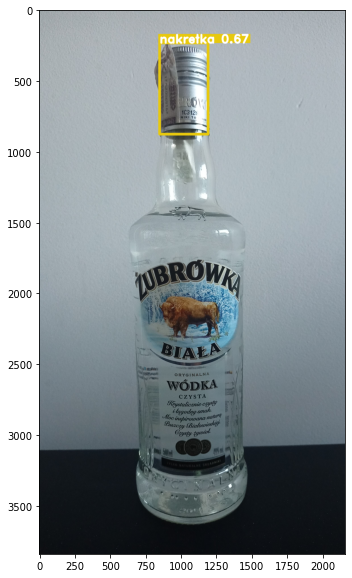

In [13]:
detections = model.predict(img_path, random_color = True)

img shape:  (416, 312, 3)
# of bboxes: 1


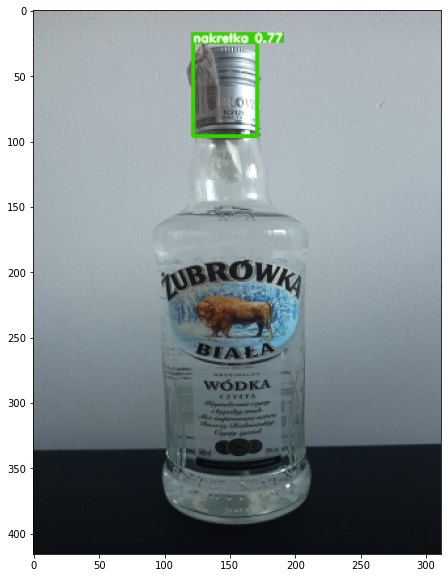

In [14]:
output_img, detections = model.predict_img(img, random_color=True, return_output=True)

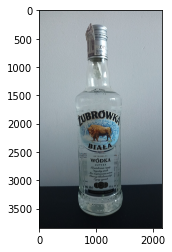

In [20]:
plt.imshow(orig_img)

In [ ]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
from config import yolo_config
import tensorflow as tf
train_lines, val_lines = read_annotation_lines('../dataset/train_annotations/butelka.txt', test_size=0.1)
FOLDER_PATH = '../dataset/train_images/'
class_name_path = '../class_names/butelka_classes.txt'
data_gen_train = DataGenerator(train_lines, class_name_path, FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, FOLDER_PATH)

model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=10000, 
          val_data_gen=data_gen_val)

In [45]:
detections.loc[:]

,x1,y1,x2,y2,class_name,score,w,h
0,732,0,1339,838,nakretka,0.940479,607,838


In [46]:

array = detections.values

In [47]:
array[0]

array([732, 0, 1339, 838, 'nakretka', 0.940479040145874, 607, 838],
      dtype=object)

In [15]:
orig_img = cv2.imread(img_path)

In [21]:
def crop_roi():
    for detection in detections.values:
        cropped_img = orig_img[detection[1]:detection[3], detection[0]:detection[2]]
        return cropped_img

cropped_img = crop_roi()
        


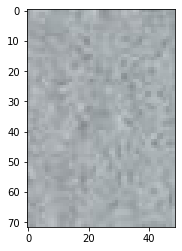

In [22]:
plt.imshow(cropped_img)

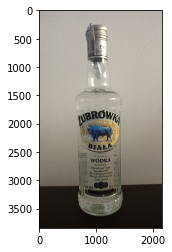

In [18]:
plt.imshow(orig_img)

In [38]:
orig_img.shape

(384, 216, 3)